In [34]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [35]:
adata = sc.read_h5ad('../data/mtDNA_DSB_5k_clustered_LLM_anno.h5ad')

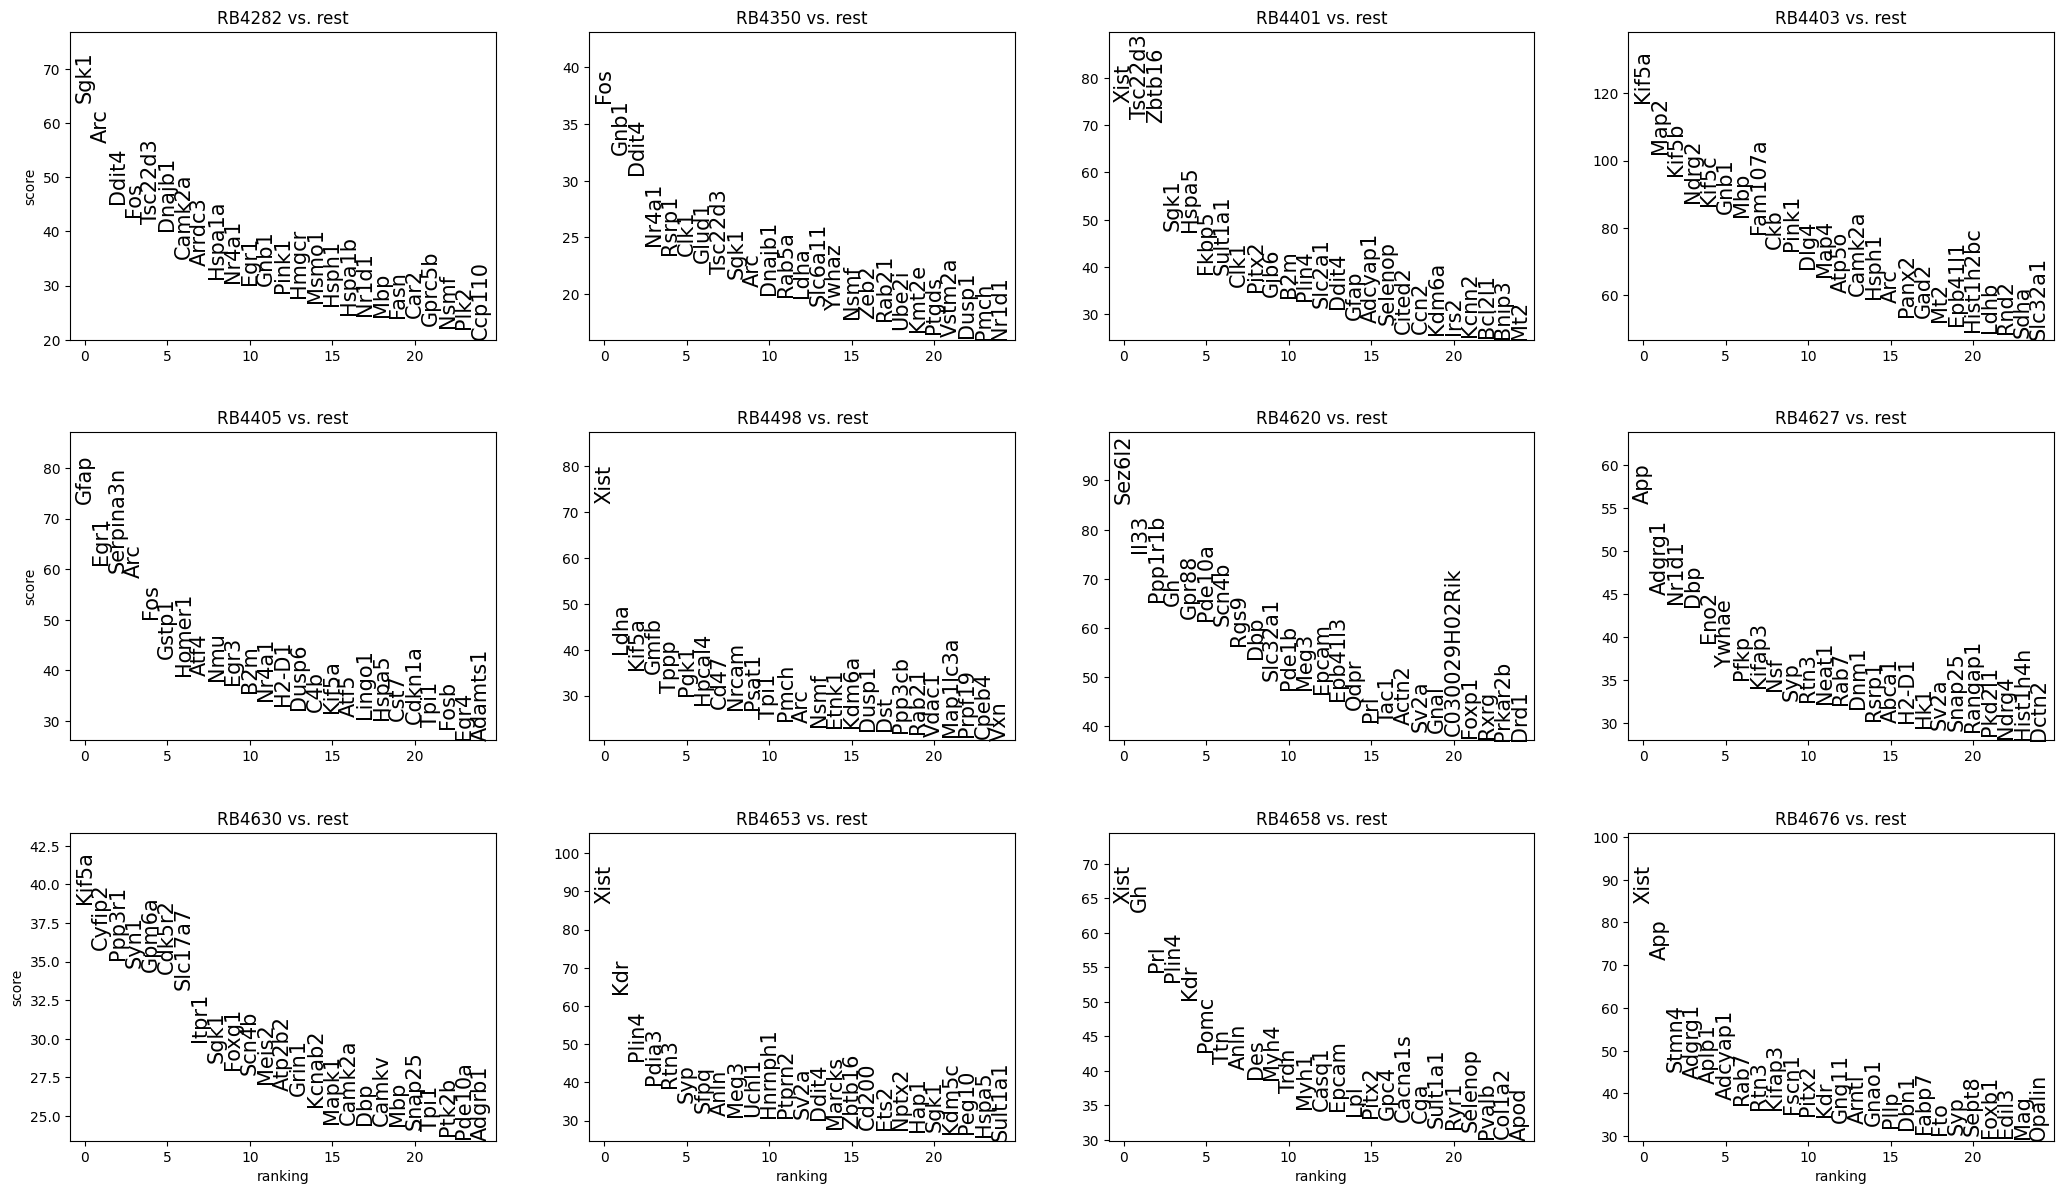

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,RB4282,Sgk1,63.659225,0.924674,0.0,0.0
1,RB4282,Arc,56.295242,0.721150,0.0,0.0
2,RB4282,Ddit4,45.068020,0.478253,0.0,0.0
3,RB4282,Fos,42.649483,0.759690,0.0,0.0
4,RB4282,Tsc22d3,41.420624,0.400506,0.0,0.0


In [36]:
# --- Find marker genes per cluster ---
sc.tl.rank_genes_groups(adata, groupby="sample_id", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, fontsize = 15)

# get a tidy table of top markers
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers.head()

In [37]:
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers.head()

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,RB4282,Sgk1,63.659225,0.924674,0.0,0.0
1,RB4282,Arc,56.295242,0.721150,0.0,0.0
2,RB4282,Ddit4,45.068020,0.478253,0.0,0.0
3,RB4282,Fos,42.649483,0.759690,0.0,0.0
4,RB4282,Tsc22d3,41.420624,0.400506,0.0,0.0


In [38]:
marker_genes = pd.DataFrame({
    group: adata.uns['rank_genes_groups']['names'][group][:10]
    for group in adata.uns['rank_genes_groups']['names'].dtype.names
})
marker_genes.head()
#marker_genes.to_csv('../data/broad_markers_leiden0-5.csv')

,RB4282,RB4350,RB4401,RB4403,RB4405,RB4498,RB4620,RB4627,RB4630,RB4653,RB4658,RB4676
0,Sgk1,Fos,Xist,Kif5a,Gfap,Xist,Sez6l2,App,Kif5a,Xist,Xist,Xist
1,Arc,Gnb1,Tsc22d3,Map2,Egr1,Ldha,Il33,Adgrg1,Cyfip2,Kdr,Gh,App
2,Ddit4,Ddit4,Zbtb16,Kif5b,Serpina3n,Kif5a,Ppp1r1b,Nr1d1,Ppp3r1,Plin4,Prl,Stmn4
3,Fos,Nr4a1,Sgk1,Ndrg2,Arc,Gmfb,Gh,Dbp,Syn1,Pdia3,Plin4,Adgrg1
4,Tsc22d3,Rsrp1,Hspa5,Kif5c,Fos,Tppp,Gpr88,Eno2,Gpm6a,Rtn3,Kdr,Aplp1


In [39]:
combined_list = []
for col in marker_genes.columns: 
    print(col)
    genes = marker_genes[col].tolist()
    print(" ".join(genes))
    print(' ')
    combined_list.append(genes)
combined_list = [item for sublist in combined_list for item in sublist]
print()

RB4282
Sgk1 Arc Ddit4 Fos Tsc22d3 Dnajb1 Camk2a Arrdc3 Hspa1a Nr4a1
 
RB4350
Fos Gnb1 Ddit4 Nr4a1 Rsrp1 Clk1 Glud1 Tsc22d3 Sgk1 Arc
 
RB4401
Xist Tsc22d3 Zbtb16 Sgk1 Hspa5 Fkbp5 Sult1a1 Clk1 Pitx2 Gjb6
 
RB4403
Kif5a Map2 Kif5b Ndrg2 Kif5c Gnb1 Mbp Fam107a Ckb Pink1
 
RB4405
Gfap Egr1 Serpina3n Arc Fos Gstp1 Homer1 Atf4 Nmu Egr3
 
RB4498
Xist Ldha Kif5a Gmfb Tppp Pgk1 Hpcal4 Cd47 Nrcam Psat1
 
RB4620
Sez6l2 Il33 Ppp1r1b Gh Gpr88 Pde10a Scn4b Rgs9 Dbp Slc32a1
 
RB4627
App Adgrg1 Nr1d1 Dbp Eno2 Ywhae Pfkp Kifap3 Nsf Syp
 
RB4630
Kif5a Cyfip2 Ppp3r1 Syn1 Gpm6a Cdk5r2 Slc17a7 Itpr1 Sgk1 Foxg1
 
RB4653
Xist Kdr Plin4 Pdia3 Rtn3 Syp Sfpq Anln Meg3 Uchl1
 
RB4658
Xist Gh Prl Plin4 Kdr Pomc Ttn Anln Des Myh4
 
RB4676
Xist App Stmn4 Adgrg1 Aplp1 Adcyap1 Rab7 Rtn3 Kifap3 Fscn1
 



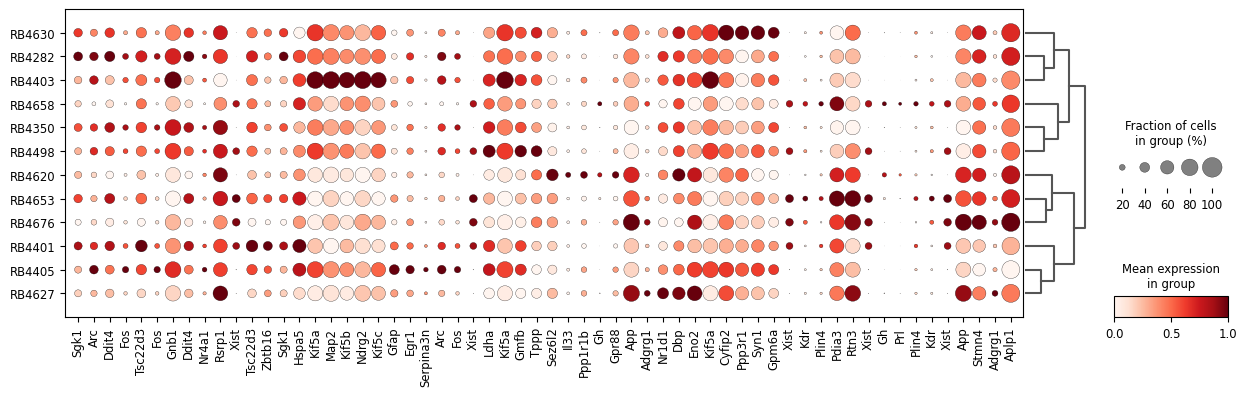

In [8]:
sc.pl.dotplot(
        adata,
        var_names=combined_list,
        groupby="sample_id",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        
        dendrogram=True,
        figsize=(15, 4)
    )

In [9]:
marker_modules = {
    "Stress_ImmediateEarly": [
        "Sgk1", "Ddit4", "Tsc22d3", "Nr4a1", "Egr1", "Fos", "Arc"
    ],
    "Mitochondrial_UPR": [
        "Hspa5", "Plin4", "Pdia3", "Pink1"
    ],
    "Cytoskeletal_Myelin": [
        "Kif5a", "Kif5b", "Kif5c", "Map2", "Tppp", "Stmn4"
    ],
    "Metabolic_Remodeling": [
        "Ldha", "Eno2", "Dbp", "Nr1d1"
    ],
    "Glial_Immune": [
        "Gfap", "Serpina3n", "Il33"
    ],
    "Neuronal_Synaptic": [
        "Gnb1", "Cyfip2", "Syn1", "Gpm6a", "Rtn3", "App", "Aplp1", "Adgrg1", "Sez6l2"
    ],
    "Hormone_Endocrine": [
        "Gh", "Prl", "Ppp1r1b", "Gpr88", "Kdr"
    ],
    "Sex_Linked": [
        "Xist"
    ]
}

categories: RB4282, RB4350, RB4401, etc.
var_group_labels: Stress_ImmediateEarly, Mitochondrial_UPR, Cytoskeletal_Myelin, etc.


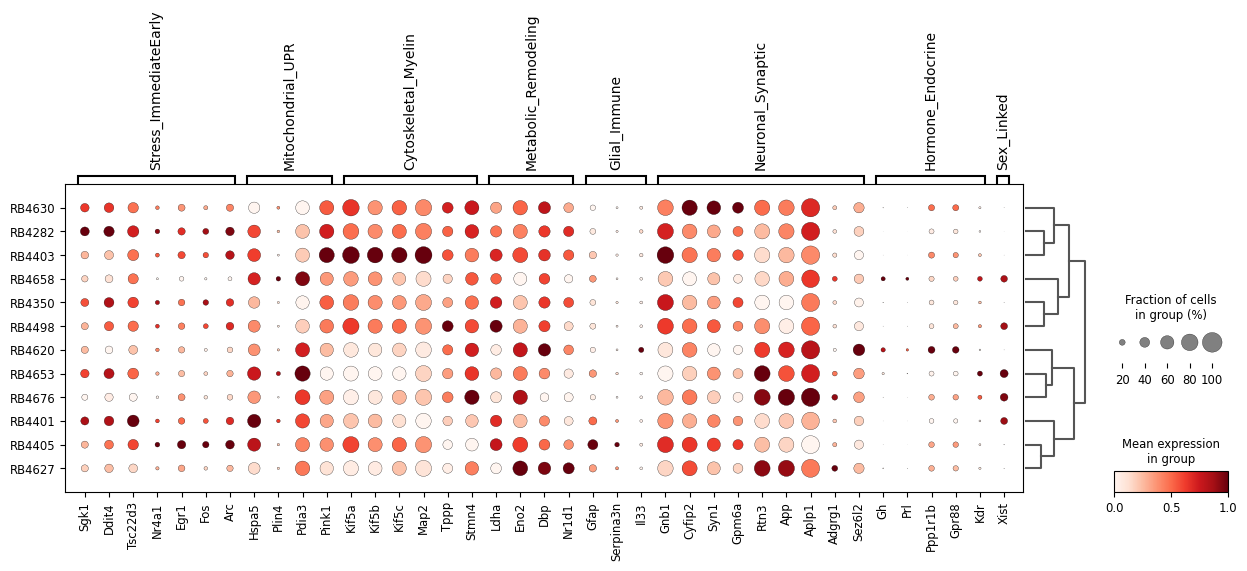

In [10]:
sc.pl.dotplot(
        adata,
        var_names=marker_modules,
        groupby="sample_id",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        
        dendrogram=True,
        figsize=(15, 4)
    )

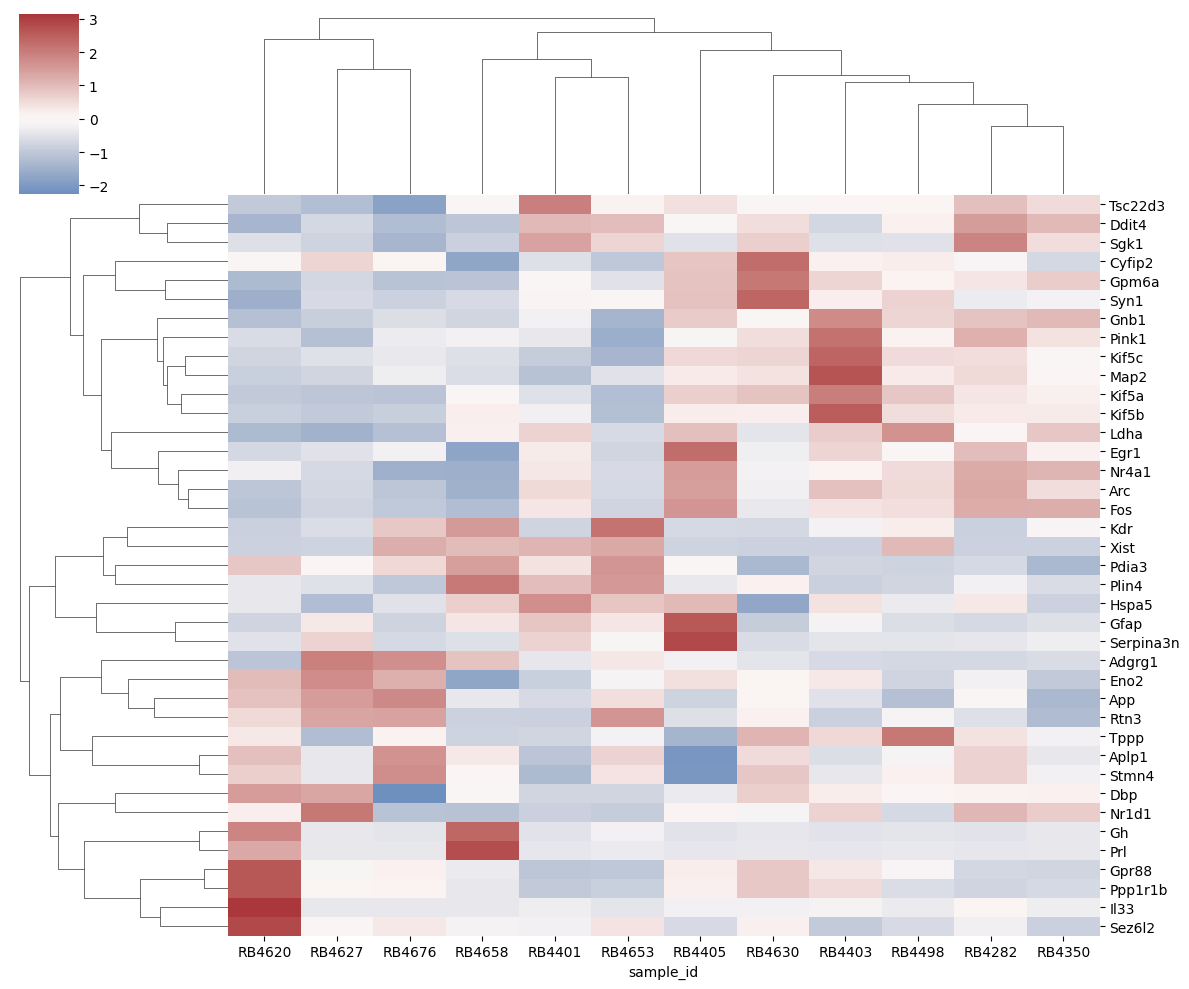

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pseudobulk per sample_id
pb = adata.to_df().groupby(adata.obs["sample_id"]).mean()

# keep only marker genes
all_markers =[g for genes in marker_modules.values() for g in genes]
pb_markers = pb.loc[:, pb.columns.intersection(all_markers)]

# scale by gene
pb_scaled = (pb_markers - pb_markers.mean(axis=0)) / pb_markers.std(axis=0)

# clustered heatmap
sns.clustermap(
    pb_scaled.T,
    col_cluster=True, row_cluster=True,
    cmap="vlag", center=0,
    figsize=(12, 10)
)
plt.show()

In [12]:
sample_annotations = {
    "RB4282": "DSB model",
    "RB4350": "DSB model",
    "RB4401": "Control",
    "RB4403": "DSB model",
    "RB4405": "DSB model",
    "RB4498": "Uncertain (maybe DSB)",
    "RB4620": "Control/uncertain",
    "RB4627": "Control/uncertain",
    "RB4630": "Uncertain",
    "RB4653": "Control",
    "RB4658": "Control",
    "RB4676": "Control",
}

In [13]:
sample_annotations_balanced = {
    "RB4282": "DSB",
    "RB4403": "DSB",
    "RB4405": "DSB",
    "RB4350": "DSB",
    "RB4498": "DSB",
    "RB4630": "DSB",
    "RB4620": "Control",
    "RB4627": "Control",
    "RB4676": "Control",
    "RB4653": "Control",
    "RB4658": "Control",
    "RB4401": "Control"
}

In [14]:
adata.obs["condition_predicted"] = adata.obs["sample_id"].map(sample_annotations_balanced)

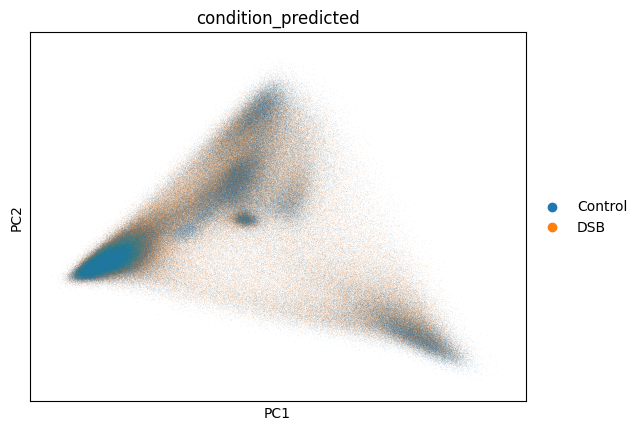

In [16]:
sc.pl.pca(adata, color="condition_predicted")

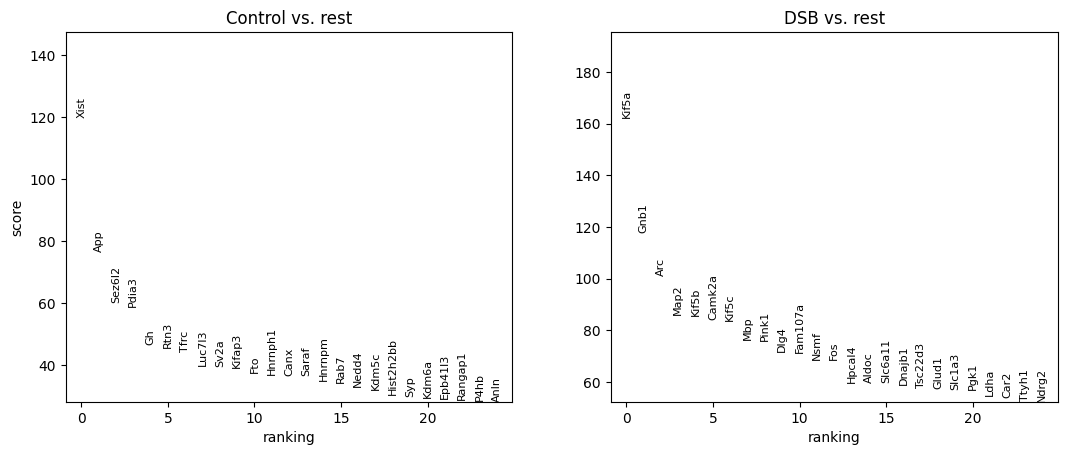

In [18]:
sc.tl.rank_genes_groups(adata, groupby="condition_predicted", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [68]:
import pandas as pd

def get_DEGs(adata, n_genes=100):
    res = adata.uns['rank_genes_groups']
    groups = res['names'].dtype.names
    dfs = []
    for g in groups:
        df = pd.DataFrame({
            "gene": res['names'][g],
            "logfoldchange": res['logfoldchanges'][g],
            "pval_adj": res['pvals_adj'][g],
            "group": g
        })
        dfs.append(df.head(n_genes))
    return pd.concat(dfs)

deg_table = get_DEGs(adata, n_genes=10)

In [69]:
deg_table

,gene,logfoldchange,pval_adj,group
0,Sgk1,0.924674,0.000000e+00,RB4282
1,Arc,0.721150,0.000000e+00,RB4282
2,Ddit4,0.478253,0.000000e+00,RB4282
3,Fos,0.759690,0.000000e+00,RB4282
4,Tsc22d3,0.400506,0.000000e+00,RB4282
...,...,...,...,...
5,Adcyap1,1.045243,0.000000e+00,RB4676
6,Rab7,0.175686,8.133951e-301,RB4676
7,Rtn3,0.178376,9.412153e-285,RB4676
8,Kifap3,0.377064,4.812487e-282,RB4676


In [70]:
import numpy as np

# compute variance across runs for each gene
mean_per_run = adata.to_df().groupby(adata.obs["sample_id"]).mean()
var_across_runs = mean_per_run.var(axis=0)

# top varying genes
top_var_genes = var_across_runs.sort_values(ascending=False).head(50)

In [71]:
top_var_genes

Mbp        0.006675
Kif5a      0.002208
Meg3       0.001507
Cnp        0.001491
Cldn11     0.001373
Aplp1      0.001291
Camk2a     0.001094
Ptgds      0.001070
Mal        0.001060
Gh         0.001038
Fam107a    0.000802
Gfap       0.000798
Car2       0.000757
Mt2        0.000710
App        0.000691
Map2       0.000684
Tsc22d3    0.000579
Ckb        0.000570
Stmn4      0.000495
Gnb1       0.000473
Ndrg2      0.000469
Arc        0.000469
Eno2       0.000426
Ermn       0.000426
Aldoc      0.000405
Sgk1       0.000400
Snap25     0.000399
Sept4      0.000388
Kif5b      0.000383
Xist       0.000379
Hpcal4     0.000376
Selenop    0.000364
Kif5c      0.000356
Mog        0.000344
Kdr        0.000343
Prl        0.000332
Nsmf       0.000328
Slc6a11    0.000306
Dbp        0.000286
Gpr88      0.000276
Camk2b     0.000264
B2m        0.000241
Apod       0.000233
Slc32a1    0.000224
Stxbp1     0.000219
Qdpr       0.000218
Hspa5      0.000216
Ywhaz      0.000205
Ppp1r1b    0.000205
Atp2b2     0.000203


In [49]:
import re

# extract "RB####" from the run string and put into new column
adata.obs["sample_id"] = adata.obs["run"].str.extract(r"(RB\d+)")

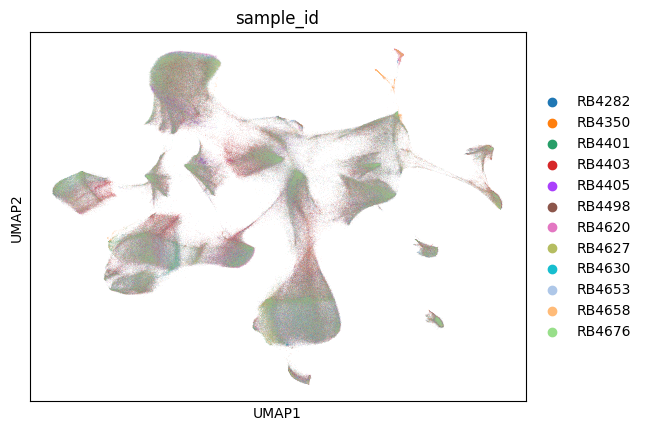

In [51]:
sc.pl.umap(adata, color="sample_id")

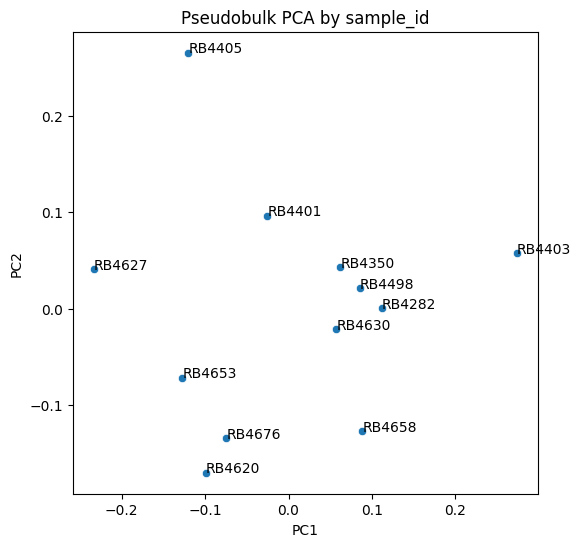

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Average expression per sample_id
pb = adata.to_df().groupby(adata.obs["sample_id"]).mean()

# Run PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(pb)

df_pca = pd.DataFrame(coords, index=pb.index, columns=["PC1","PC2"])

# Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x="PC1", y="PC2", data=df_pca)
for i, txt in enumerate(df_pca.index):
    plt.annotate(txt, (df_pca.PC1[i], df_pca.PC2[i]))
plt.title("Pseudobulk PCA by sample_id")
plt.show()

In [56]:
import pandas as pd
loadings = pd.Series(pca.components_[0], index=pb.columns)  # PC1 loadings
print(loadings.sort_values(ascending=False).head(20))

Mbp        0.528226
Kif5a      0.269194
Cnp        0.204408
Camk2a     0.193287
Fam107a    0.155195
Mal        0.144871
Map2       0.139523
Kif5b      0.123051
Cldn11     0.121177
Gnb1       0.112989
Ndrg2      0.111173
Sept4      0.108990
Ptgds      0.104996
Aldoc      0.101828
Nsmf       0.099866
Kif5c      0.098106
Ckb        0.095488
Gprc5b     0.090579
Pink1      0.090385
Slc6a11    0.088682
dtype: float32


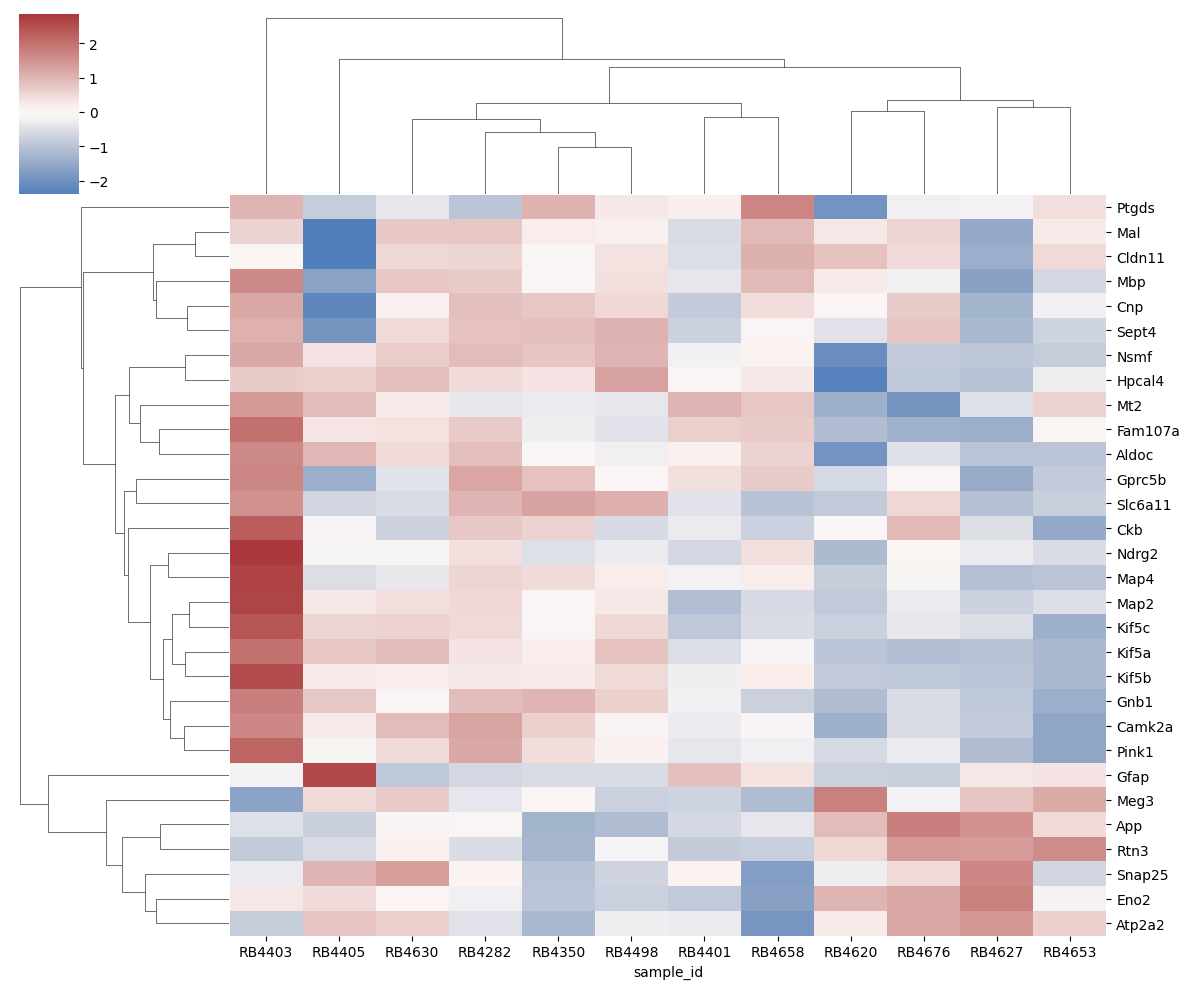

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Get top PC1 loadings (absolute value to get both positive & negative drivers) ---
pc1_loadings = pd.Series(pca.components_[0], index=pb.columns)
top_genes = pc1_loadings.abs().sort_values(ascending=False).head(30).index

# --- Subset pseudobulk matrix ---
pb_pc1 = pb[top_genes]

# --- Z-score per gene ---
pb_pc1_scaled = (pb_pc1 - pb_pc1.mean(axis=0)) / pb_pc1.std(axis=0)

# --- Clustered heatmap ---
sns.clustermap(
    pb_pc1_scaled.T,
    col_cluster=True, row_cluster=True,
    cmap="vlag", center=0,
    figsize=(12, 10),
    xticklabels=True, yticklabels=True
)
plt.show()

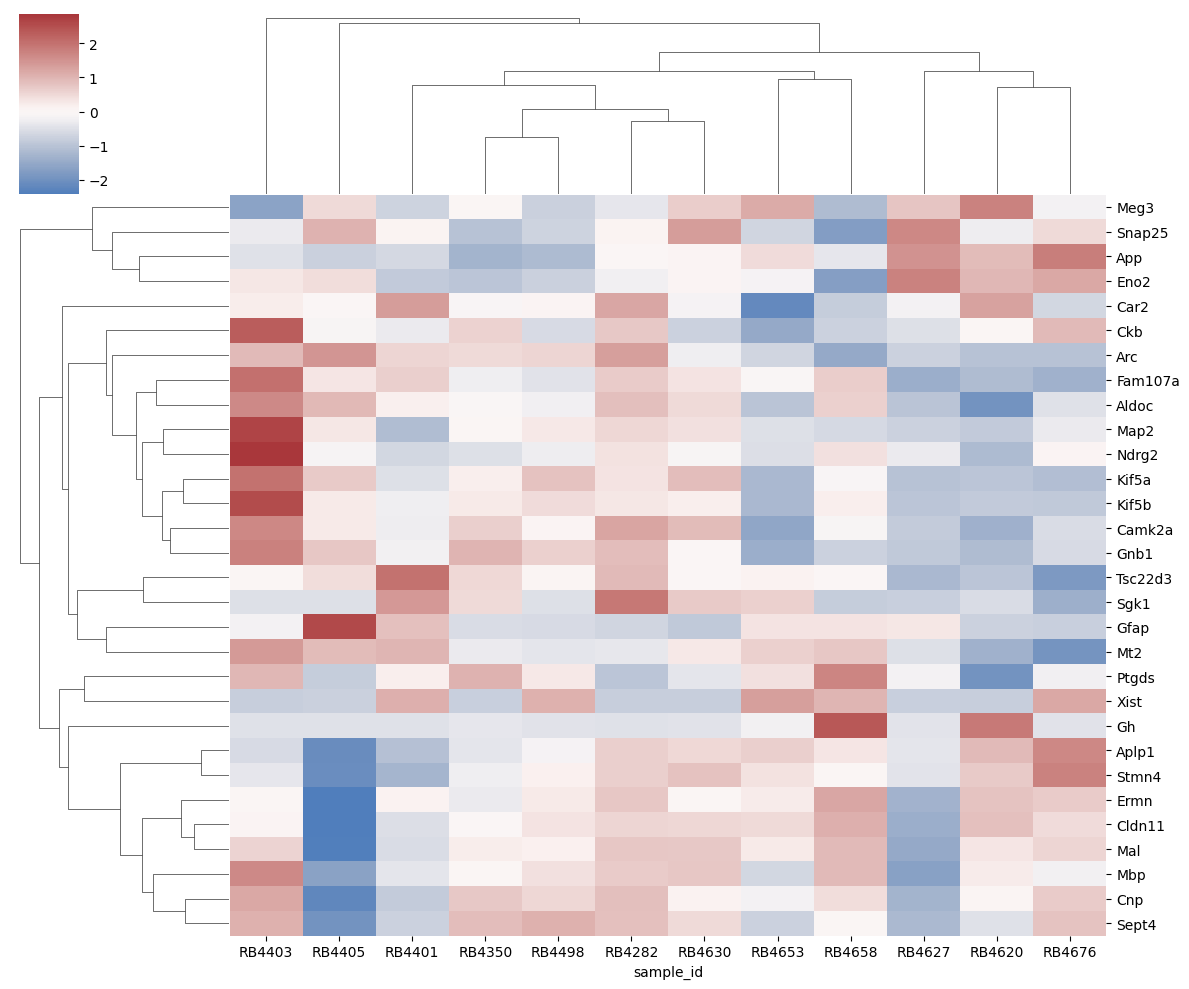

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1. Pseudobulk: average per sample_id ---
pb = adata.to_df().groupby(adata.obs["sample_id"]).mean()

# --- Step 2. Select top variable genes ---
top_var = pb.var(axis=0).sort_values(ascending=False).head(30).index
pb_top = pb[top_var]

# --- Step 3. Scale by gene (z-score) ---
pb_scaled = (pb_top - pb_top.mean(axis=0)) / pb_top.std(axis=0)

# --- Step 4. Clustered heatmap ---
sns.clustermap(
    pb_scaled.T,  # genes as rows
    col_cluster=True, row_cluster=True,
    cmap="vlag", center=0,
    figsize=(12, 10),
    xticklabels=True, yticklabels=True
)
plt.show()

Root: RB4676
Ordered samples: ['RB4676', 'RB4653', 'RB4627', 'RB4620', 'RB4658', 'RB4350', 'RB4630', 'RB4282', 'RB4405', 'RB4401', 'RB4498', 'RB4403']


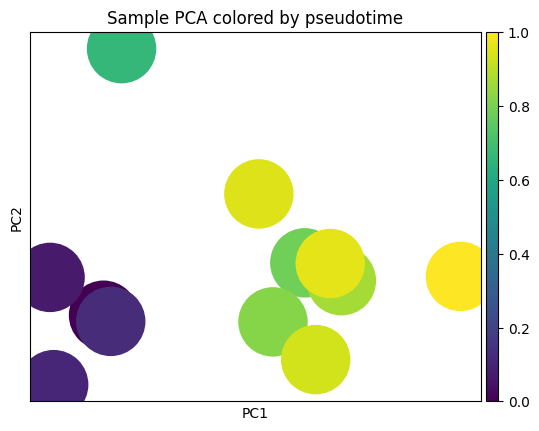

In [22]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# ---------- 0) inputs ----------
# assumes you already have: adata.obs["sample_id"]
# (optionally subset to OLs beforehand)

# define marker modules (edit if you like)
stress_genes = [
    "Sgk1","Ddit4","Tsc22d3","Pink1","Mt2","Hspa1a","Hspa1b","Hsph1","Dnajb1","Atf4","Atf5"
]
myelin_genes = [
    "Mbp","Mog","Mag","Cnp","Cldn11","Mal","Ermn","Pllp","Aspa","Ugt8a","Ptgds","Car2","Sept4"
]

# ---------- 1) pseudobulk by sample ----------
# average expression per sample (use mean; you can use sum for counts if desired)
pb = adata.to_df().groupby(adata.obs["sample_id"]).mean()
# store list of sample_ids
sample_ids = pb.index.tolist()

# ---------- 2) build a samples×genes AnnData ----------
adata_pb = sc.AnnData(pb.values)
adata_pb.obs.index = sample_ids
adata_pb.var.index = pb.columns

# ---------- 3) dimensionality reduction & pseudotime ----------
# scale (z-score genes) for stability at sample level
sc.pp.scale(adata_pb, max_value=10)
sc.tl.pca(adata_pb, n_comps=10)
sc.pp.neighbors(adata_pb, n_neighbors=min(6, adata_pb.n_obs-1), n_pcs=10)  # small graph; n_obs is small (12)
sc.tl.diffmap(adata_pb)
# pick a root sample automatically: lowest stress / highest myelin, or just the first
# we'll choose the sample with minimal stress-minus-myelin score as root (control-like)
# compute quick module summaries on *unscaled* pb
def safe_mean(mat, genes):
    g = [g for g in genes if g in mat.columns]
    return mat[g].mean(axis=1) if len(g) else pd.Series(0, index=mat.index)

stress_score_pb = safe_mean(pb, stress_genes)
myelin_score_pb = safe_mean(pb, myelin_genes)
# after neighbors + diffmap on adata_pb
# choose a root sample (e.g., lowest stress − myelin)
root_sample = (stress_score_pb - myelin_score_pb).idxmin()
root_index  = list(adata_pb.obs_names).index(root_sample)

# set the root index for DPT in .uns['iroot']
adata_pb.uns['iroot'] = root_index

# now run DPT (no root args here)
sc.tl.dpt(adata_pb, n_dcs=5)

# pseudotime is stored here:
pt = adata_pb.obs['dpt_pseudotime']
print("Root:", root_sample)
print("Ordered samples:", list(pt.sort_values().index))
# ---------- 4) plots: PCA & Diffusion colored by pseudotime ----------
sc.pl.pca(adata_pb, color="dpt_pseudotime", title="Sample PCA colored by pseudotime")



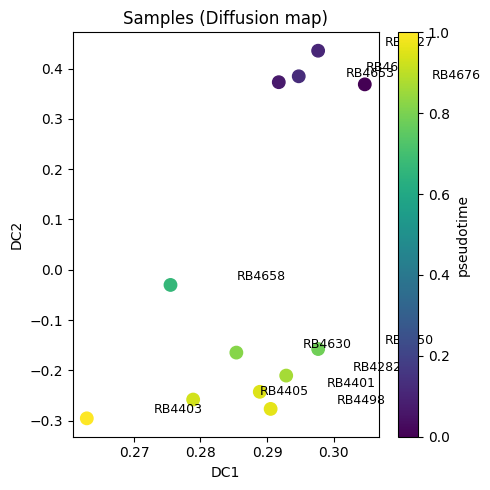

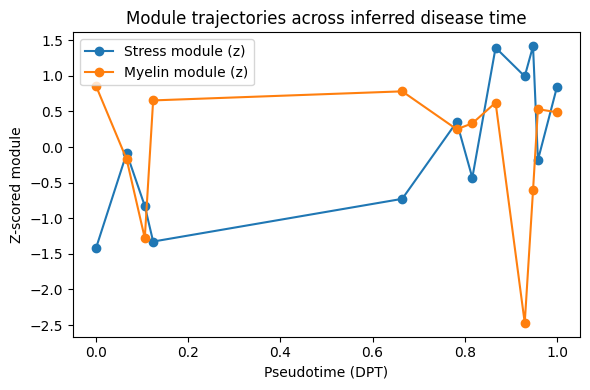


Root sample chosen (control-like): RB4676

Samples ordered by pseudotime (early → late):
['RB4676', 'RB4653', 'RB4627', 'RB4620', 'RB4658', 'RB4350', 'RB4630', 'RB4282', 'RB4405', 'RB4401', 'RB4498', 'RB4403']


In [23]:
# diffusion components scatter
import matplotlib.pyplot as plt
X = adata_pb.obsm["X_diffmap"][:, :2]
plt.figure(figsize=(5,5))
sc = plt.scatter(X[:,0], X[:,1], c=adata_pb.obs["dpt_pseudotime"], s=80)
for i, sid in enumerate(adata_pb.obs_names):
    plt.text(X[i,0]+0.01, X[i,1]+0.01, sid, fontsize=9)
plt.xlabel("DC1"); plt.ylabel("DC2"); plt.title("Samples (Diffusion map)")
plt.colorbar(sc, label="pseudotime")
plt.tight_layout(); plt.show()

# ---------- 5) module trends along pseudotime ----------
# align to pseudotime order
order = adata_pb.obs["dpt_pseudotime"].sort_values().index
stress_aligned = stress_score_pb.loc[order]
myelin_aligned = myelin_score_pb.loc[order]
ptime = adata_pb.obs.loc[order, "dpt_pseudotime"]

plt.figure(figsize=(6,4))
plt.plot(ptime.values, (stress_aligned - stress_aligned.mean())/stress_aligned.std(), marker='o', label="Stress module (z)")
plt.plot(ptime.values, (myelin_aligned - myelin_aligned.mean())/myelin_aligned.std(), marker='o', label="Myelin module (z)")
plt.xlabel("Pseudotime (DPT)"); plt.ylabel("Z-scored module")
plt.title("Module trajectories across inferred disease time")
plt.legend(); plt.tight_layout(); plt.show()

# ---------- 6) handy outputs ----------
print("\nRoot sample chosen (control-like):", root_sample)
print("\nSamples ordered by pseudotime (early → late):")
print(list(order))

# also store results for downstream
adata_pb.obs["stress_score"] = stress_score_pb
adata_pb.obs["myelin_score"] = myelin_score_pb
# save if you want
# adata_pb.write_h5ad("samples_pseudotime.h5ad", compression="gzip")

In [24]:
# correlations between pseudotime and modules
pt = adata_pb.obs['dpt_pseudotime']
from scipy.stats import spearmanr, kendalltau

for name, vec in {"Stress": adata_pb.obs["stress_score"],
                  "Myelin": adata_pb.obs["myelin_score"]}.items():
    print(name, "Spearman r, p=", spearmanr(pt, vec))
    print(name, "Kendall tau, p=", kendalltau(pt, vec))

Stress Spearman r, p= SignificanceResult(statistic=0.6993006993006995, pvalue=0.011374198642690932)
Stress Kendall tau, p= SignificanceResult(statistic=0.5454545454545454, pvalue=0.013770768197851531)
Myelin Spearman r, p= SignificanceResult(statistic=-0.21678321678321683, pvalue=0.49855598552418856)
Myelin Kendall tau, p= SignificanceResult(statistic=-0.1515151515151515, pvalue=0.5452047007776174)


In [25]:
# top loadings on DC1 (or PC1 if you used PCA)
dc1 = pd.Series(adata_pb.obsm['X_diffmap'][:,0], index=adata_pb.obs_names)
# already computed stress/myelin lists earlier; you can also get per-gene correlations:
mean_expr = pb  # samples x genes (unscaled)
cors = mean_expr.apply(lambda g: spearmanr(pt, g)[0], axis=0).sort_values()
print("Most decreasing along time:", cors.head(15).index.tolist())
print("Most increasing along time:", cors.tail(15).index.tolist())

Most decreasing along time: ['Pald1', 'Pcnt', 'Brd8', 'Kcnq1', 'Sema4g', 'Pbrm1', 'Mlh1', 'Sptlc2', 'Cd3eap', 'Patz1', 'Ikbkb', 'Psma4', 'Ankrd11', 'Kat6a', 'Wwox']
Most increasing along time: ['Dbx2', 'Csde1', 'Ppara', 'Sept9', 'March5', 'Sod2', 'Limk1', 'Fam210a', 'Zbtb7a', 'Slc8a1', 'Rbm8a', 'Gmfb', 'Snx5', 'Ubac1', 'Pgk1']


In [26]:
order = pt.sort_values().index
stages = {sid: ("early" if i < 4 else "mid" if i < 8 else "late")
          for i, sid in enumerate(order)}
adata_pb.obs["stage_blind"] = adata_pb.obs_names.map(stages)

In [27]:
adata_pb.obs["stage_blind"]

RB4282      mid
RB4350      mid
RB4401     late
RB4403     late
RB4405     late
RB4498     late
RB4620    early
RB4627    early
RB4630      mid
RB4653    early
RB4658      mid
RB4676    early
Name: stage_blind, dtype: object

In [ ]:
sample_annotations_balanced = {
    "RB4282": "DSB",
    "RB4403": "DSB",
    "RB4405": "DSB",
    "RB4350": "DSB",
    "RB4498": "DSB",
    "RB4630": "DSB",
    "RB4620": "Control",
    "RB4627": "Control",
    "RB4676": "Control",
    "RB4653": "Control",
    "RB4658": "Control",
    "RB4401": "Control"
}

In [29]:
import pandas as pd
import scanpy as sc

# pseudobulk (samples x genes)
pb = adata.to_df().groupby(adata.obs["sample_id"]).mean()

stress = ["Sgk1","Ddit4","Tsc22d3","Pink1","Mt2","Hspa1a","Hspa1b","Hsph1","Dnajb1","Atf4","Atf5", 'Serpina3n','Ldha']
myelin = ["Mbp","Mog","Mag","Cnp","Cldn11","Mal","Ermn","Pllp","Aspa","Ugt8a","Ptgds","Car2","Sept4"]

def score(mat, genes):
    g = [x for x in genes if x in mat.columns]
    return mat[g].mean(axis=1) if g else pd.Series(0, index=mat.index)

s_stress = score(pb, stress)
s_myelin = score(pb, myelin)

anchor_control = (s_stress - s_myelin).idxmin()
print("Anchor control:", anchor_control)

Anchor control: RB4658


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# ---------- 0) inputs ----------
# assumes you already have: adata.obs["sample_id"]
# (optionally subset to OLs beforehand)

# define marker modules (edit if you like)
stress_genes = [
    "Sgk1","Ddit4","Tsc22d3","Pink1","Mt2","Hspa1a","Hspa1b","Hsph1","Dnajb1","Atf4","Atf5"
]
myelin_genes = [
    "Mbp","Mog","Mag","Cnp","Cldn11","Mal","Ermn","Pllp","Aspa","Ugt8a","Ptgds","Car2","Sept4"
]

# ---------- 1) pseudobulk by sample ----------
# average expression per sample (use mean; you can use sum for counts if desired)
pb = adata.to_df().groupby(adata.obs["sample_id"]).mean()
# store list of sample_ids
sample_ids = pb.index.tolist()

# ---------- 2) build a samples×genes AnnData ----------
adata_pb = sc.AnnData(pb.values)
adata_pb.obs.index = sample_ids
adata_pb.var.index = pb.columns

# ---------- 3) dimensionality reduction & pseudotime ----------
# scale (z-score genes) for stability at sample level
sc.pp.scale(adata_pb, max_value=10)
sc.tl.pca(adata_pb, n_comps=10)
sc.pp.neighbors(adata_pb, n_neighbors=min(6, adata_pb.n_obs-1), n_pcs=10)  # small graph; n_obs is small (12)
sc.tl.diffmap(adata_pb)
# pick a root sample automatically: lowest stress / highest myelin, or just the first
# we'll choose the sample with minimal stress-minus-myelin score as root (control-like)
# compute quick module summaries on *unscaled* pb
def safe_mean(mat, genes):
    g = [g for g in genes if g in mat.columns]
    return mat[g].mean(axis=1) if len(g) else pd.Series(0, index=mat.index)

stress_score_pb = safe_mean(pb, stress_genes)
myelin_score_pb = safe_mean(pb, myelin_genes)
# after neighbors + diffmap on adata_pb
# choose a root sample (e.g., lowest stress − myelin)
root_sample = (stress_score_pb - myelin_score_pb).idxmin()
root_index  = list(adata_pb.obs_names).index(root_sample)

# set the root index for DPT in .uns['iroot']
adata_pb.uns['iroot'] = root_index

# now run DPT (no root args here)
sc.tl.dpt(adata_pb, n_dcs=5)

# pseudotime is stored here:
pt = adata_pb.obs['dpt_pseudotime']
print("Root:", root_sample)
print("Ordered samples:", list(pt.sort_values().index))
# ---------- 4) plots: PCA & Diffusion colored by pseudotime ----------
sc.pl.pca(adata_pb, color="dpt_pseudotime", title="Sample PCA colored by pseudotime")

